### This notebook will serve as a sandbox for bespoke visualizations for the project

In [12]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper 
import warnings
warnings.filterwarnings('ignore')

# load the data
data = pd.read_csv('../data/merged_data.csv')

data.shape

(1321, 420)

In [19]:
data[[col for col in data.columns if 'meds_' in col]].describe()

,meds_methadone_0,meds_buprenorphine_0,meds_methadone_1,meds_buprenorphine_1,meds_methadone_2,meds_buprenorphine_2,meds_methadone_3,meds_buprenorphine_3,meds_methadone_4,meds_buprenorphine_4,...,meds_methadone_20,meds_buprenorphine_20,meds_methadone_21,meds_buprenorphine_21,meds_methadone_22,meds_buprenorphine_22,meds_methadone_23,meds_buprenorphine_23,meds_methadone_24,meds_buprenorphine_24
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,...,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.00000
mean,28.741862,12.056018,124.707040,55.943982,156.167298,57.576079,156.913702,51.464042,176.908403,55.633611,...,202.626041,35.706283,177.019682,30.548827,174.221802,32.007570,171.118849,29.776684,326.801665,46.62377
std,64.011546,24.326190,184.171115,73.079450,234.977839,79.368762,239.350127,74.409008,281.369562,88.042684,...,381.803655,71.416639,349.738036,63.218854,320.630966,65.625683,324.767717,62.421266,946.492982,117.25750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,8.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,30.000000,12.000000,260.000000,108.000000,330.000000,112.000000,325.000000,100.000000,350.000000,108.000000,...,315.000000,30.000000,240.000000,12.000000,280.000000,10.000000,265.000000,6.000000,325.000000,48.00000
max,500.000000,216.000000,960.000000,448.000000,1460.000000,408.000000,1120.000000,336.000000,1780.000000,902.000000,...,2730.000000,544.000000,3510.000000,448.000000,1960.000000,512.000000,2610.000000,576.000000,20062.000000,1638.00000


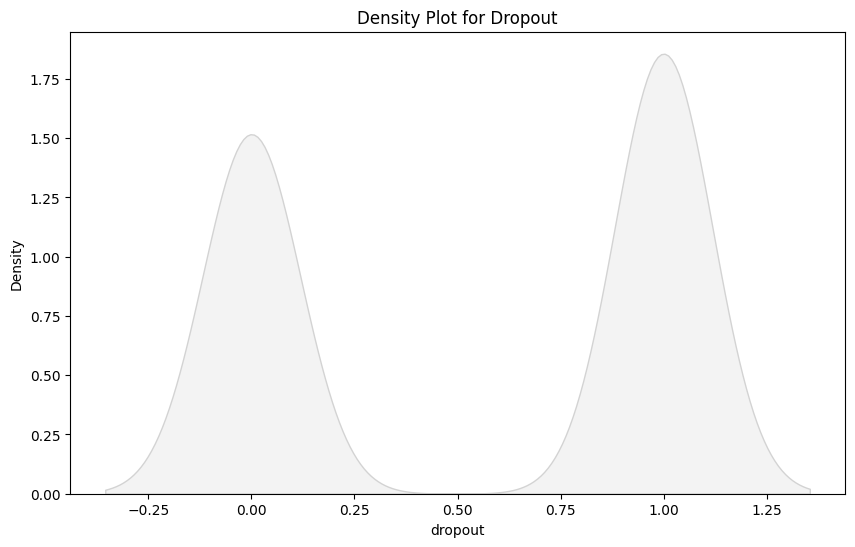

In [11]:
# create a density plot for the target variable
plt.figure(figsize=(10, 6))
sns.kdeplot(data['dropout'], shade=True, color='lightgray', label='dropout')
plt.title('Density Plot for Dropout')
plt.show()

### Build a Dataframe with Time Series for Plotting
- We will create a multi-layered plot that shows insight on patient population treatment response
- To create a multi-layered plot, we will create 3 different series, representing:
    - Total Positive Test Rates for Patient Population
    - Total Negative Test Rates for Methadone Patient Group
    - Total Negative Test Rates for Buprenorphine Patient Group
<br><br>
We will create a bar plot for the total positive test rates and line plots for the negative test rates for each patient group<br>

In [ ]:
# create the test dataframe, use list comprehension to call all columns that start with 'test_Opiate300'
# then add the medication column at the end to filter the data
tests = data[[col for col in data.columns if col.startswith('test_Opiate300')]+['medication']]

# remove the column names to create a test matrix with numbers for columns
tests.columns = tests.columns.str.replace('test_Opiate300_', '')

# there is a value -5 which indicates test results unclear
# count how many times -5 occurs in tests and compare to dataset
tests[tests == -5].count().sum()/tests.size

# the total accounts for .005 of the data, so we can update these to 0
# better not to skew the positive test data as the % of -5 is so low
for col in tests.columns:
    tests[col] = tests[col].replace(-5, 0)

# create methadone test group
methadone = tests[tests['medication'] == 1.0]

# slice off the final column, aggregate cols with sum 
# transform to dataframe and rename column to patient group
methadone = methadone.iloc[:, :-1].sum().to_frame('methadone_group')

# create buprenorphine test group
buprenorphine = tests[tests['medication'] == 2.0]

# slice off the final column, aggregate cols with sum 
# transform to series and rename column to patient group
buprenorphine = buprenorphine.iloc[:, :-1].sum().to_frame('buprenorphine_group')

# merge series
test_results = pd.concat([methadone, buprenorphine], axis=1)

# create total column, sum of both test groups
test_results['total'] = (test_results['methadone_group'] + test_results['buprenorphine_group'])

test_results

In [ ]:
# Adjusted code to ensure colors show up in the legend

# set figure size and axis
fig, ax = plt.subplots(figsize=(14, 4))
# plot count of total tests between patient groups as barplot
sns.barplot(x=test_results.index, y=test_results.total, color='darkgray', ax=ax)

# Use ax.plot for consistency with seaborn's ax
# layer in line plots for methadone and buprenorphine patient groups
ax.plot(np.array(methadone.index), np.array(methadone.methadone_group), marker='_', color='blue', linewidth=2.5, label='Methadone')
ax.plot(np.array(buprenorphine.index), np.array(buprenorphine.buprenorphine_group), marker='_', color='red', linewidth=2.5, label='Buprenorphine')

# Create legend to the right, outside of the plot, using ax.legend for consistency
ax.legend(loc='upper right')

# Set the title and labels
ax.set_title('Number of Positive Opiate Tests by Treatment Group')
ax.set_xlabel('Week of Treatment')
ax.set_ylabel('Number of Positive Opiate Tests');